In [18]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm

In [19]:
# path = 'Experiments/Lyapunov_eq_van_der_pool_2d_train_False (3)'
# all_files = glob.glob(os.path.join(path, "*.csv"))
# op = [pd.read_csv(f, header = 0) for f in all_files]

In [20]:
# def make_good_dfs(df):
#     df = df.T
#     new_header = df.iloc[0] #grab the first row for the header
#     df = df[1:] #take the data less the header row
#     df.columns = new_header #set the header row as the df header
#     return df
# dfs = [make_good_dfs(df) for df in op]

In [21]:
path = 'Experiments/Lyapunov_eq_van_der_pool_2d_train_True (7)'
all_files = glob.glob(os.path.join(path, "*.csv"))
ep = [pd.read_csv(f) for f in all_files]
del ep[2]

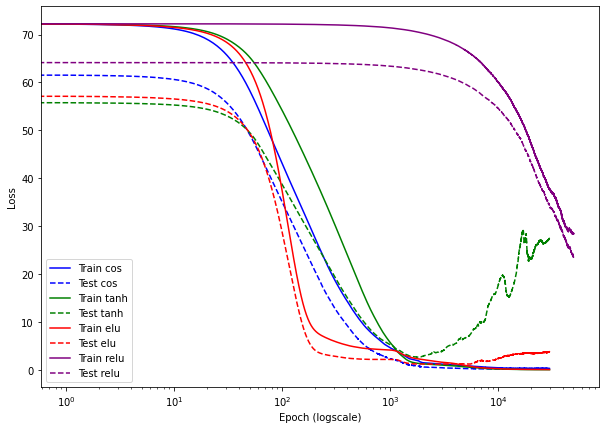

In [22]:
acts = ['cos', 'tanh', 'elu', 'relu']
cols = ['blue', 'green', 'red', 'purple']
plt.figure(figsize=(10,7))
for (m, df, cl) in zip(acts, ep, cols):
    plt.plot(df['all_loss_values'], c = cl, label = 'Train ' + m)
    plt.plot(df['all_test_loss_values'], '--', c= cl, label = 'Test ' + m)
    plt.xscale('log')
plt.xlabel('Epoch (logscale)')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
path = 'Experiments/Lyapunov_eq_van_der_pool_2d_train_True (13)'
all_files = glob.glob(os.path.join(path, "*.csv"))
ep = [pd.read_csv(f) for f in all_files]

In [24]:
acts = ['cos', 'tanh', 'elu']
for n, i in enumerate(all_files):
    for activ in acts:
        if activ in i:
            ep[n][activ] = 1
        else:
            ep[n][activ] = 0

In [25]:
ns = ['n_30.','n_90.','n_136.','n_200.','n_300.','n_675.','n_1000.','n_1350.','n_2500.']
for n, i in enumerate(all_files):
    for number in ns:
        if number in i:
            ep[n][number] = 1
        else:
            ep[n][number] = 0

In [26]:
df = pd.concat(ep, axis=0)
df.head(3)

,Unnamed: 0,all_loss_values,all_test_loss_values,cos,tanh,elu,n_30.,n_90.,n_136.,n_200.,n_300.,n_675.,n_1000.,n_1350.,n_2500.
0,0,68.500620,52.666683,1,0,0,0,0,0,0,0,1,0,0,0
1,1,68.431680,52.585890,1,0,0,0,0,0,0,0,1,0,0,0
2,2,68.356476,52.499393,1,0,0,0,0,0,0,0,1,0,0,0


In [27]:
acts = ['cos', 'tanh', 'elu']
cols = ['blue', 'green', 'red']
final_loss_values_cos = []
final_loss_values_tanh = []
final_loss_values_elu = []
final_loss_values_cost = []
final_loss_values_tanht = []
final_loss_values_elut = []
for num in ns:
    final_loss_value_c = df[(df['cos'] ==1) & (df[num] == 1)]['all_loss_values'].iloc[-1]
    final_loss_values_cos.append(final_loss_value_c)
    final_loss_value_ct = df[(df['cos'] ==1) & (df[num] == 1)]['all_test_loss_values'].iloc[-1]
    final_loss_values_cost.append(final_loss_value_ct)

    final_loss_value_t = df[(df['tanh'] ==1) & (df[num] == 1)]['all_loss_values'].iloc[-1]
    final_loss_values_tanh.append(final_loss_value_t)
    final_loss_value_tt = df[(df['tanh'] ==1) & (df[num] == 1)]['all_test_loss_values'].iloc[-1]
    final_loss_values_tanht.append(final_loss_value_tt)

    final_loss_value_e = df[(df['elu'] ==1) & (df[num] == 1)]['all_loss_values'].iloc[-1]
    final_loss_values_elu.append(final_loss_value_e)
    final_loss_value_et = df[(df['elu'] ==1) & (df[num] == 1)]['all_test_loss_values'].iloc[-1]
    final_loss_values_elut.append(final_loss_value_et)


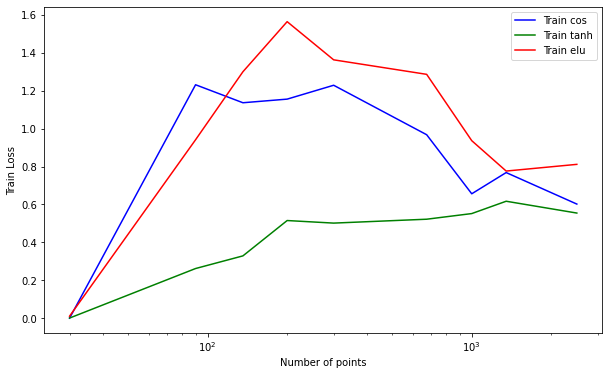

In [39]:
n_num = [30, 90, 136, 200, 300, 675, 1000, 1350, 2500]
plt.figure(figsize=(10,6))
plt.plot(n_num, final_loss_values_cos, label = 'Train cos', c = 'blue')
# plt.plot(n_num, final_loss_values_cost, '--', label = 'Test cos',c = 'blue')
plt.plot(n_num, final_loss_values_tanh, label = 'Train tanh', c='green')
# plt.plot(n_num, final_loss_values_tanht, '--', label = 'Test tanh', c='green')
plt.plot(n_num, final_loss_values_elu, label = 'Train elu', c='red')
# plt.plot(n_num, final_loss_values_elut, '--', label = 'Test elu' ,c='red')
plt.xlabel('Number of points')
plt.ylabel('Train Loss')
plt.xscale('log')
plt.legend()
plt.show()

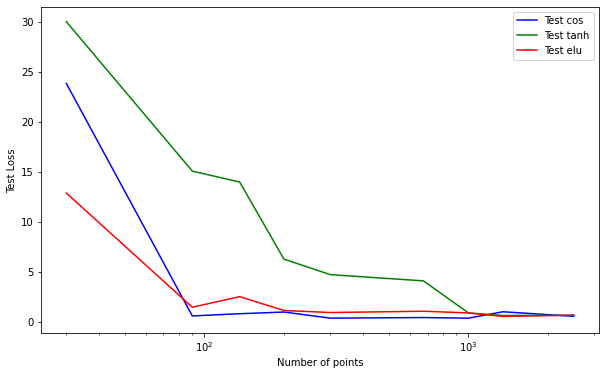

In [38]:
plt.figure(figsize=(10,6))
plt.plot(n_num, final_loss_values_cost, label = 'Test cos',c = 'blue')
plt.plot(n_num, final_loss_values_tanht,  label = 'Test tanh', c='green')
plt.plot(n_num, final_loss_values_elut,  label = 'Test elu' ,c='red')
plt.xlabel('Number of points')
plt.ylabel('Test Loss')
# plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [30]:
path = 'Experiments/Lyapunov_eq_van_der_pool_2d_train_False (7)'
all_files = glob.glob(os.path.join(path, "*.csv"))
all_ms = [pd.read_csv(f) for f in all_files]
df = pd.concat(all_ms, axis=0)
df

,Unnamed: 0,all_loss_values,all_test_loss_values,activation,m,n
0,0,72.242610,71.255775,<function cos at 0x7fabfa70a710>,80,300
1,1,59.210262,59.059890,<function cos at 0x7fabfa70a710>,80,300
2,2,49.500454,49.518700,<function cos at 0x7fabfa70a710>,80,300
3,3,42.083683,41.969830,<function cos at 0x7fabfa70a710>,80,300
4,4,36.319690,35.942024,<function cos at 0x7fabfa70a710>,80,300
...,...,...,...,...,...,...
9995,9995,1.283819,0.616905,<function cos at 0x7fabfa70a710>,160,300
9996,9996,1.283775,0.616886,<function cos at 0x7fabfa70a710>,160,300
9997,9997,1.283731,0.616867,<function cos at 0x7fabfa70a710>,160,300
9998,9998,1.283687,0.616848,<function cos at 0x7fabfa70a710>,160,300


In [31]:
df_ms = pd.get_dummies(df, columns=['m'])

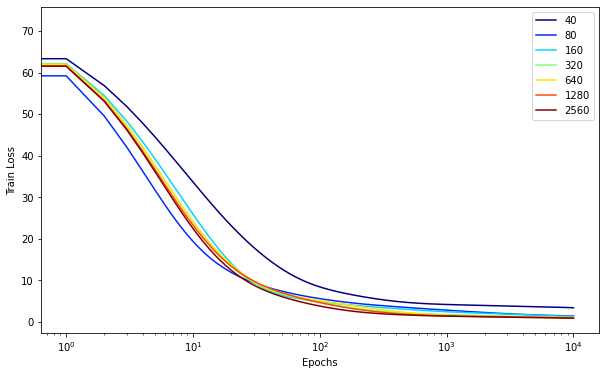

In [50]:
ms = ['m_40', 'm_80', 'm_160', 'm_320', 'm_640', 'm_1280', 'm_2560']
color = cm.jet(np.linspace(0, 1, len(ms)))

plt.figure(figsize=(10,6))
for m, cl in zip(ms, color):
    plt.plot(df_ms[df_ms[m] == 1]['all_loss_values'], label = m[2:], c = cl)
    # plt.plot(df_ms[df_ms[m] == 1]['all_test_loss_values'], label = m[2:], c= cl)
plt.xscale('log')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()

In [33]:
ms_nums = [40, 80, 160, 320, 640, 1280, 2560]

all_loss = [df_ms[df_ms[m] ==1]['all_loss_values'].iloc[-1] for m in ms]
all_test_loss = [df_ms[df_ms[m] ==1]['all_test_loss_values'].iloc[-1] for m in ms]

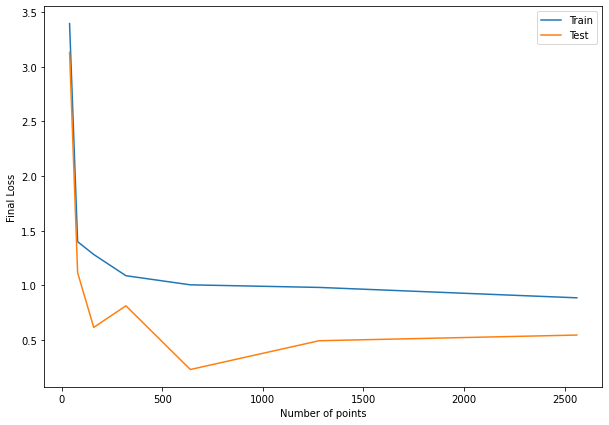

In [49]:
plt.figure(figsize=(10,7))
plt.plot(ms_nums, all_loss, label = 'Train')
plt.plot(ms_nums, all_test_loss, label = 'Test')
# plt.xscale('log')
plt.legend()
plt.xlabel('Number of points')
plt.ylabel('Final Loss')
plt.show()
